In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

import requests

In [42]:
from warnings import filterwarnings
filterwarnings("ignore")

# Download the Processed Data from API 

In [34]:
download_url = "http://127.0.0.1:8000/download/processed"
response = requests.get(download_url)
response.status_code

200

In [36]:
data = pd.DataFrame(response.json())
data.tail(3)

,Year,Quarter,type,Devices,Tests,Avg_Avg_U_Kbps,Avg_Avg_D_Kbps,Avg_Lat_Ms,Rank_Upload,Rank_Download,Rank_Latency,UploadtoDownloadRatio,Year/Quarter
19,2022,1,mobile,59835,147842,10698,17823,37,151,194,97,0.600236,2022/1
20,2022,2,mobile,59809,144895,11545,19661,39,132,184,124,0.587203,2022/2
21,2022,3,mobile,58520,136997,11656,19646,41,123,182,110,0.593301,2022/3


# Analysis

## Type

In [37]:
type_ = data.type

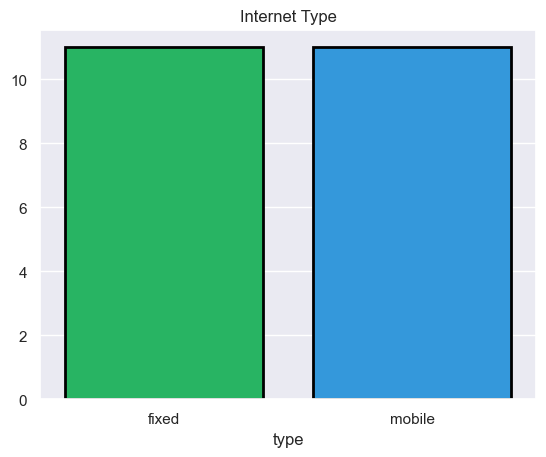

In [61]:
sns.barplot(x=type_.value_counts().index,y=type_.value_counts().values,palette=sns.color_palette(["#28b463","#3498db"]),saturation=1,lw=2,ec="black")

plt.title("Internet Type")
plt.savefig("../visualizations/internet_type.png")
plt.show()

- **Discrete Uniform Distribution** with U~(0,1)

## Devices

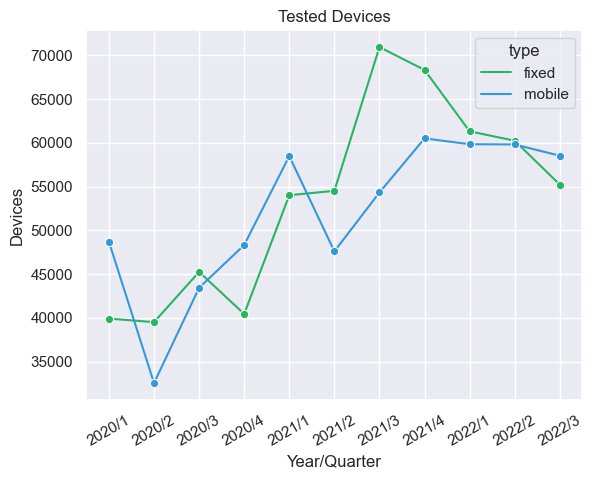

In [69]:
sns.lineplot(data=data,x="Year/Quarter",y="Devices",hue="type",marker='o',palette=sns.color_palette(["#28b463","#3498db"]))

plt.title("Tested Devices")
plt.xticks(rotation=30)
plt.savefig("../visualizations/devices.png")
plt.show()

- We see that Tested Devices increases much in 2021/2022.
- Highest number of testing devices were in forth quarter of 2021.
- Most of the tested were from **fixed** internet.

## Tests

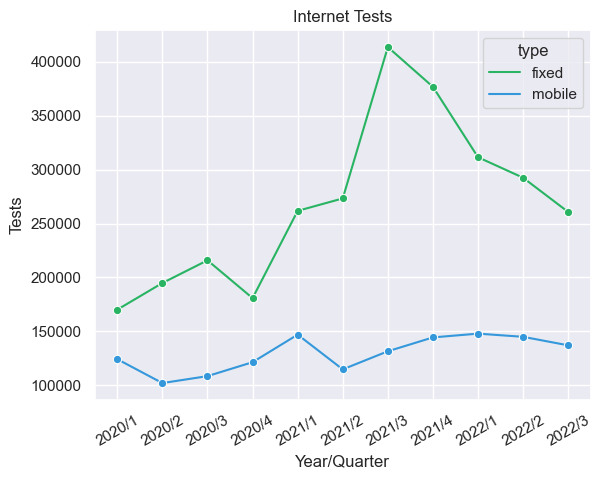

In [65]:
sns.lineplot(data=data,x="Year/Quarter",y="Tests",hue="type", marker='o',palette=sns.color_palette(["#28b463","#3498db"]))

plt.title("Internet Tests")
plt.xticks(rotation=30)
plt.savefig("../visualizations/tests.png")
plt.show()

- Tests from **fixed** internet are much higher.
- Tests from **fixed** internet were peek at 2021/3.
- Tests decrease at 2022.

## Avg_Avg_U_Kbps

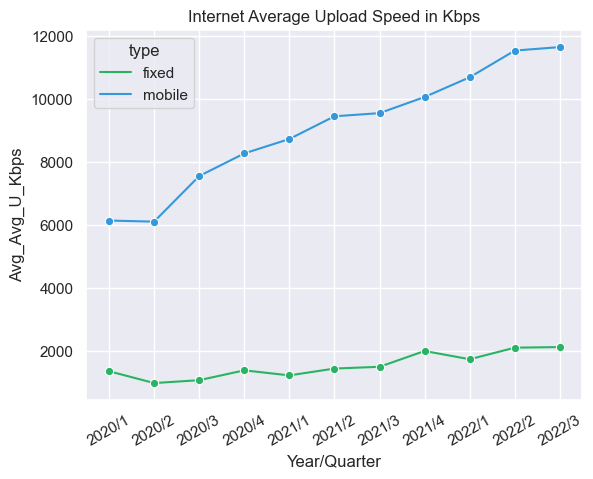

In [60]:
sns.lineplot(data=data,x="Year/Quarter",y="Avg_Avg_U_Kbps",hue="type", marker='o',palette=sns.color_palette(["#28b463","#3498db"]))

plt.title("Internet Average Upload Speed in Kbps")
plt.xticks(rotation=30)
plt.savefig("../visualizations/Avg_Avg_U_Kbps.png")
plt.show()

- Average Upload Speed is much much higher for **mobile** than **fixed**.
- Average Upload Speed increasing for **mobile**.
- Average Upload Speed fixed at 2 Mbps for **fixed** internet.

## Avg_Avg_D_Kbps

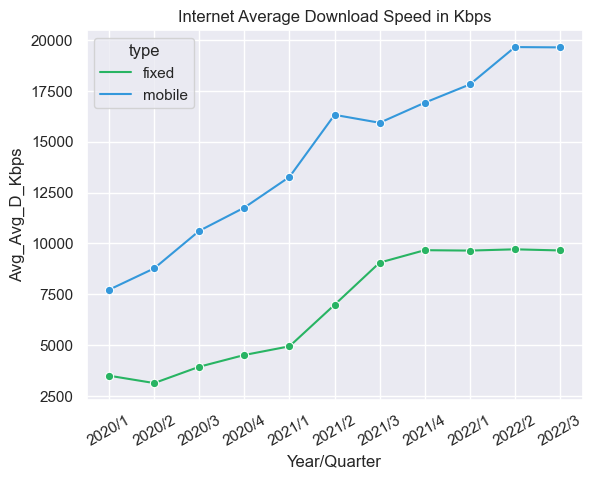

In [70]:
sns.lineplot(data=data,x="Year/Quarter",y="Avg_Avg_D_Kbps",hue="type", marker='o',palette=sns.color_palette(["#28b463","#3498db"]))

plt.title("Internet Average Download Speed in Kbps")
plt.xticks(rotation=30)
plt.savefig("../visualizations/Avg_Avg_D_Kbps.png")
plt.show()

- Average Download Speed is higher for **mobile** than **fixed**.
- Average Download Speed increasing for **mobile**.
- Average Download Speed for **fixed** internet increased between 2020/2 and 2021/4 then fixed at 10 Mbps after.   

## Avg_Lat_Ms

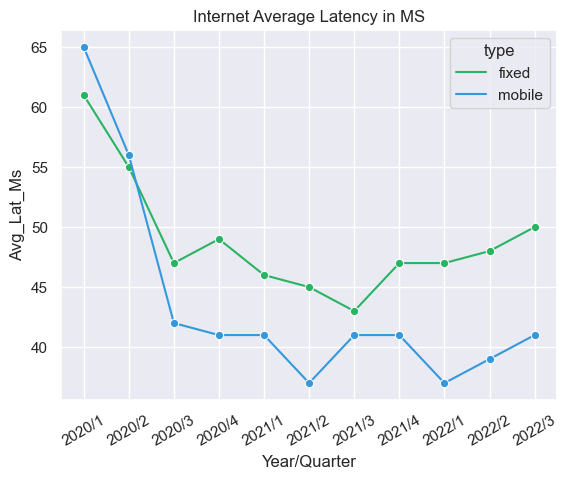

In [72]:
sns.lineplot(data=data,x="Year/Quarter",y="Avg_Lat_Ms",hue="type", marker='o',palette=sns.color_palette(["#28b463","#3498db"]))

plt.title("Internet Average Latency in MS")
plt.xticks(rotation=30)
plt.savefig("../visualizations/Avg_Lat_Ms.png")
plt.show()

- **Latency** has decreased much for both **mobile** and **fixed** but it starts increasing slightly in 2022.

## Upload to Download Ratio

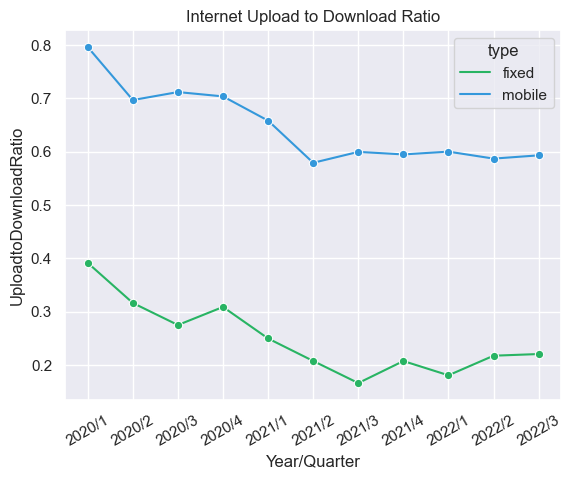

In [73]:
sns.lineplot(data=data,x="Year/Quarter",y="UploadtoDownloadRatio",hue="type", marker='o',palette=sns.color_palette(["#28b463","#3498db"]))

plt.title("Internet Upload to Download Ratio")
plt.xticks(rotation=30)
plt.savefig("../visualizations/UploadtoDownloadRatio.png")
plt.show()

- **Upload to Download Ratio** is too low for **fixed** ~40% and it keeps deceasing, it reached ~20%.
- **Upload to Download Ratio** is acceptable for **mobile** with ~70% and also its decreasing, it reached ~60%.

## Rank Upload

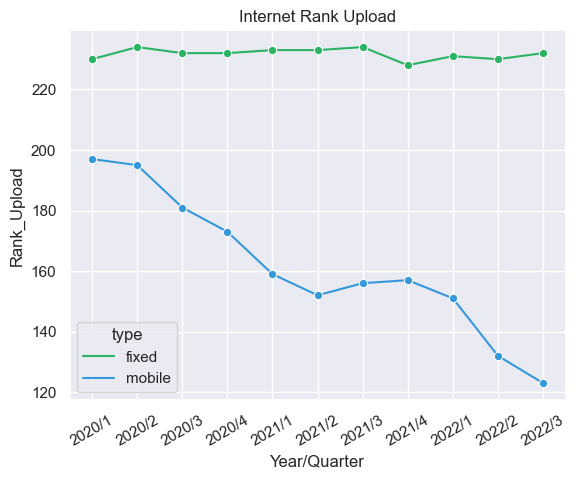

In [74]:
sns.lineplot(data=data,x="Year/Quarter",y="Rank_Upload",hue="type", marker='o',palette=sns.color_palette(["#28b463","#3498db"]))

plt.title("Internet Rank Upload")
plt.xticks(rotation=30)
plt.savefig("../visualizations/Rank_Upload.png")
plt.show()

- **Upload Rank** for **mobile** deceased much but **fixed** fixed at more than 220.

## Rank Download

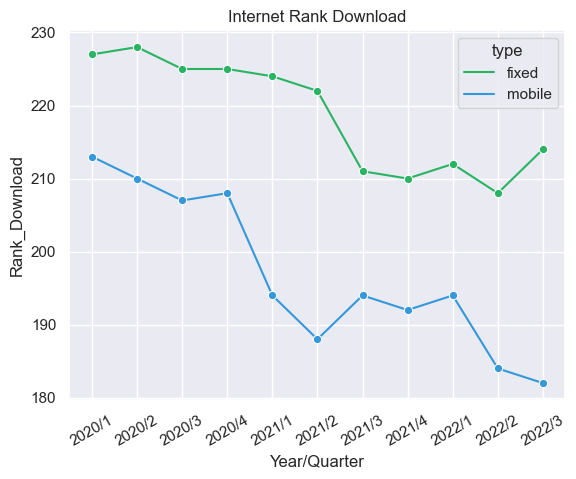

In [75]:
sns.lineplot(data=data,x="Year/Quarter",y="Rank_Download",hue="type", marker='o',palette=sns.color_palette(["#28b463","#3498db"]))

plt.title("Internet Rank Download")
plt.xticks(rotation=30)
plt.savefig("../visualizations/Rank_Download.png")
plt.show()

- **Download Rank** deceased for both **fixed** and **mobile** but **fixed** starts increasing.

## Rank Latency

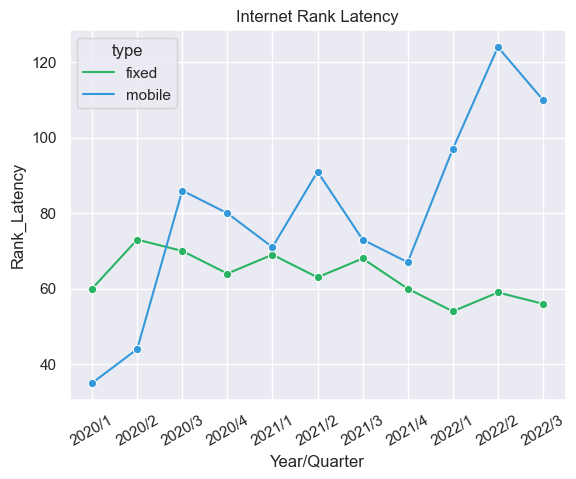

In [77]:
sns.lineplot(data=data,x="Year/Quarter",y="Rank_Latency",hue="type", marker='o',palette=sns.color_palette(["#28b463","#3498db"]))

plt.title("Internet Rank Latency")
plt.xticks(rotation=30)
plt.savefig("../visualizations/Rank_Latency.png")
plt.show()

- **Latency Rank** decreases slithlyy for **fixed** and increased too highly for **mobile**. 